#### Importing all the required libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Importing the dataset

In [6]:
df = pd.read_csv("crime_data.csv")

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [7]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
df.rename({'Unnamed: 0':'States of America'}, axis=1, inplace=True)
df.head(10)

,States of America,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [10]:
#Checking for null values
df.isnull().sum()

States of America    0
Murder               0
Assault              0
UrbanPop             0
Rape                 0
dtype: int64

In [11]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


The explaination is as follows:
The first line creates an instance of the MinMaxScaler class and assigns it to the variable n. The MinMaxScaler is a common technique used for feature scaling, which scales the features to a specified range, usually between 0 and 1.

The second line of code applies the fit_transform method of the MinMaxScaler to the dataset. It selects all rows (:) and all columns starting from the second column (1:) using iloc. The to_numpy() method converts the selected portion of the DataFrame into a NumPy array. The fit_transform method then scales the selected data.

The third line of code creates a new DataFrame called crimes using the scaled data. The data array is used as the data for the new DataFrame, and the column names are set using the column names from the original crime DataFrame, excluding the first column (df.columns[1:]).

In [12]:
crimes_data=df.copy()

#### Analyzing the Dataset 

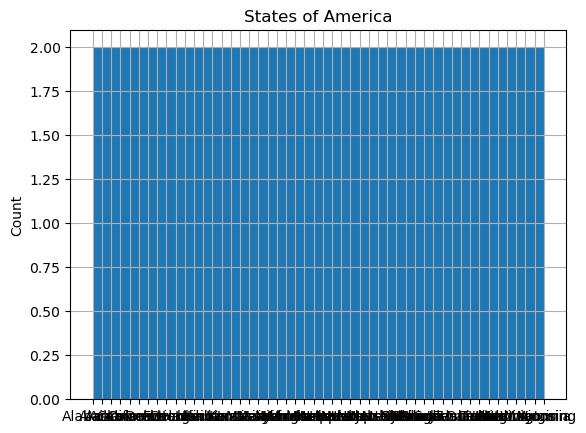

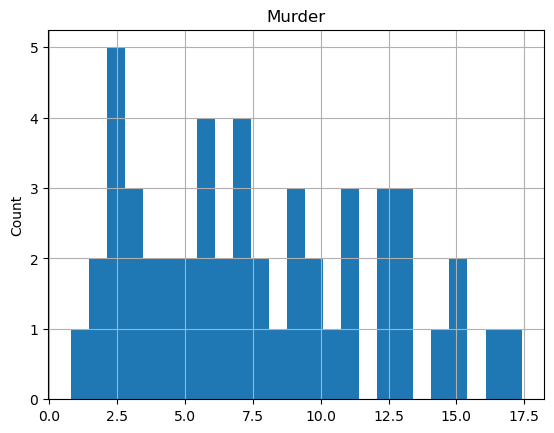

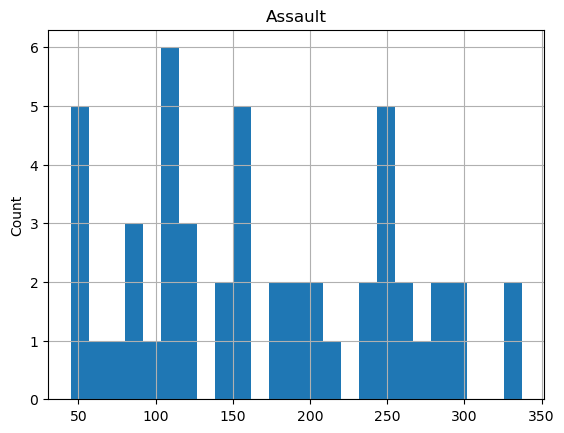

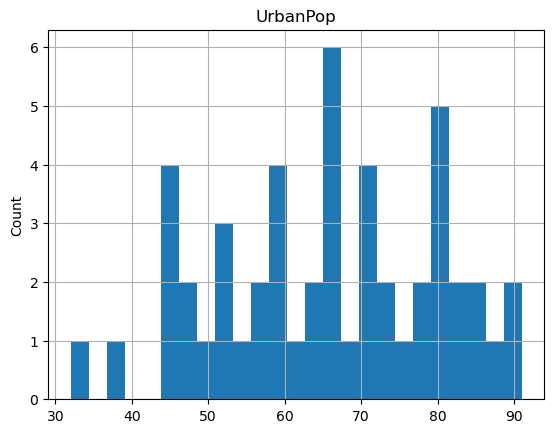

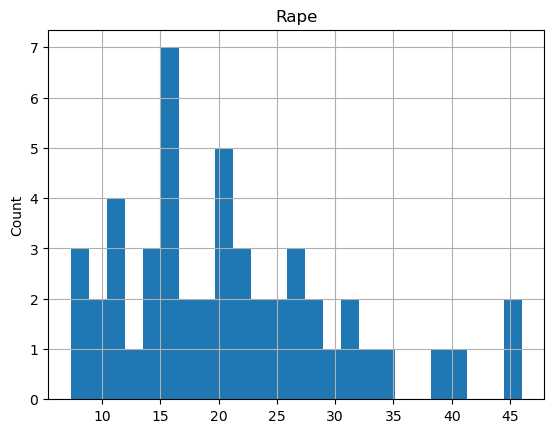

In [13]:
#Assuming you have imported the crime dataset into a pandas DataFrame called 'df'
for feature in crimes_data.columns:
    df[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In the above code, we have plotted the histogram of each column of the dataset 'crimes'. This code will iterate over each column in the 'crimes' DataFrame. Separate histogram plots have been plotted for individual columns

#### Detection of Outliers

In [14]:
crimes_data.columns

Index(['States of America', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

TypeError: Horizontal orientation requires numeric `x` variable.

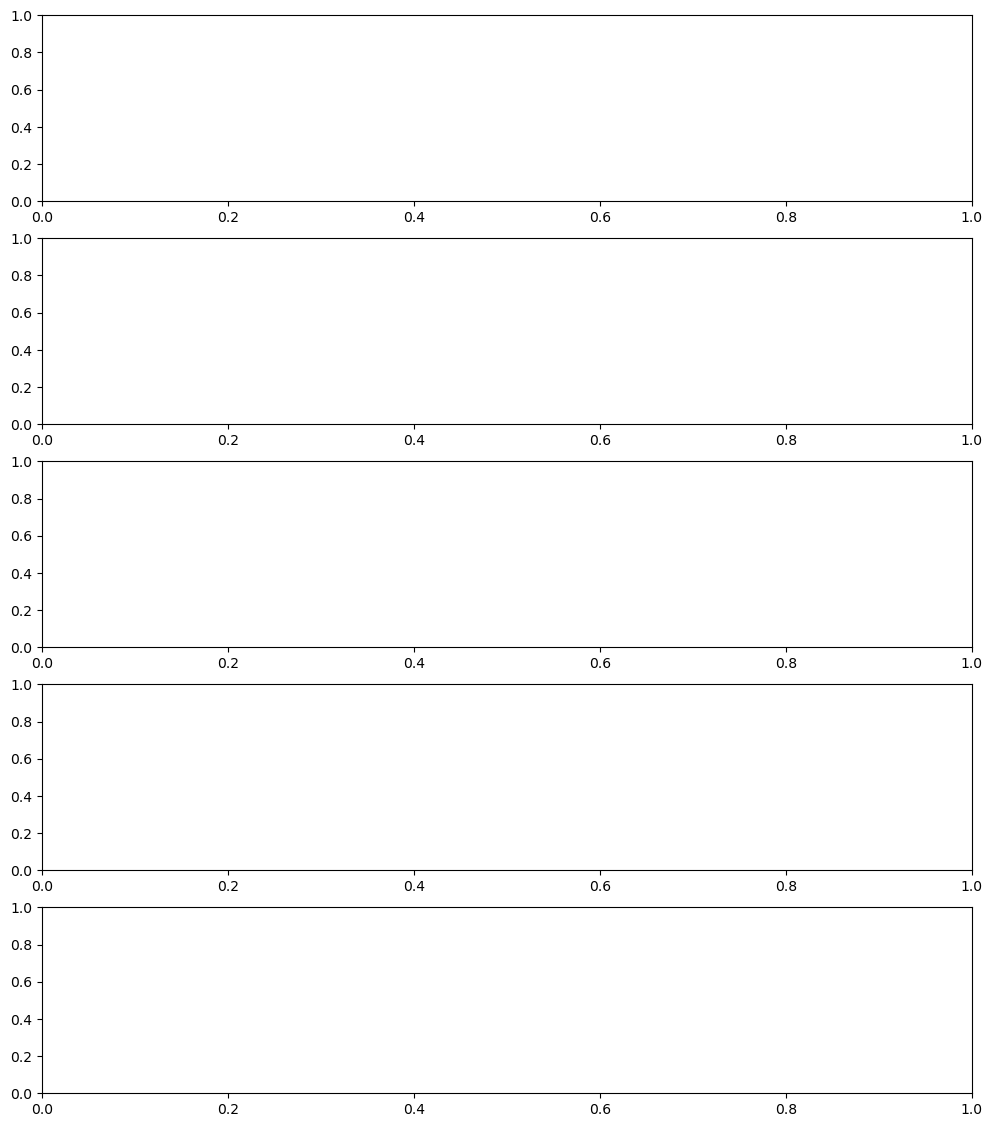

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

outlier = crimes_data

fig, axes = plt.subplots(5, 1, figsize=(12, 14), sharex=False, sharey=False)

sns.boxplot(x=outlier['States of America'], palette='crest', ax=axes[0])
axes[0].set_xlabel('States of America')

sns.boxplot(x=outlier['Murder'], palette='crest', ax=axes[1])
axes[1].set_xlabel('Murder')

sns.boxplot(x=outlier['Assault'], palette='crest', ax=axes[2])
axes[2].set_xlabel('Assault')

sns.boxplot(x=outlier['UrbanPop'], palette='crest', ax=axes[3])
axes[3].set_xlabel('UrbanPop')

sns.boxplot(x=outlier['Rape'], palette='crest', ax=axes[4])
axes[4].set_xlabel('Rape')

plt.tight_layout(pad=1)

plt.show()


# Hierarchy Clustering

First, we will create dendrogram in order to determine the number of clusters.

In [ ]:
#Creating a dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16, 10))
dendrogram = sch.dendrogram(sch.linkage(crimes, method='average'))

# Customization (optional)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram of Crimes')

plt.show()

Steps to create a dendrogram:
1. Import the necessary libraries
   import matplotlib.pyplot as plt
    import scipy.cluster.hierarchy as sch
    
2.Define the data you want to cluster. In the above case , the data we have taken is that of crimes.

3.Create the dendrogram using the dendrogram function from the sch module and assign it to a variable, such as dendrogram.

4.Customize the plot if desired, such as adjusting the figure size or adding labels to the axes.

In [ ]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

#As the data is stored in the dataframe named crimes
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
clusters = hc.fit_predict(crimes)

In [ ]:
n = MinMaxScaler()
data= n.fit_transform(df.iloc[:,1:].to_numpy())
crimes = pd.DataFrame(data, columns = df.columns[1:])
crimes.head(4)

The explaination of the above code is as follows:
As we have used agglomerative clustering , the explaination of the above terms are as follows:
  
n_clusters=5: This specifies that you want to create 5 clusters.
  
affinity='euclidean': This indicates that you want to use the Euclidean distance as the distance metric for calculating the similarity between points.

linkage='average': This specifies that you want to use the average linkage method for merging clusters during the clustering process.

Agglomerative Clustering is a hierarchical clustering algorithm that starts with each sample as an individual cluster and then merges the closest pairs of clusters until the desired number of clusters is reached. The affinity metric determines the distance between samples, and the linkage method determines how to measure the distance between clusters.

After fitting the clustering model, the fit_predict method assigns cluster labels to each data point in the input dataset crimes, and the resulting labels are stored in the clusters variable.

In [16]:
#Create a DataFrame with the cluster labels
cc = pd.DataFrame(clusters, columns=['Clusters'])
cc.head(6)

NameError: name 'clusters' is not defined

In the above code, the cluster labels are assigned to the DataFrame cc, where each row corresponds to a data point and the column 'Clusters' contains the cluster label for that data point.

In [ ]:
crimes_new=pd.concat([crimes,cc],axis=1)
crimes_new.head()

To concatenate two DataFrames, "crimes" and "cc," along the columns axis (axis=1). The resulting DataFrame is stored in the variable "crimes_new." Finally, the first few rows of the resulting DataFrame are displayed using the "head()" method.


In [ ]:
crimes_new.sort_values("Clusters").reset_index()

The above code is sorting the DataFrame "crimes_new" by the column "Clusters" and then resetting the index. The resulting DataFrame will have a new index that starts from 0 and is incremented by 1 for each row.

By resetting the index, the previous index values will be moved to a new column called "index." This is helpful if you want to retain the original index values as a separate column in the DataFrame.

In [ ]:
crimes_new['Clusters'].value_counts()

To get the value counts of each unique value in the "Clusters" column of the "crimes_new" DataFrame. The value_counts() gives us the number of unique values. 

In [ ]:
crimes_new['Clusters'].mean()